# Задания  

1. Для данных MNIST построить нейронную сеть с выводом логов для tensorboard. Посмотреть в изменение логов в процессе обучения.
2. Сравнить поведение процесса обучения различными оптимизаторами для модели (графики истории).
3. Изменить структуру сети так, чтобы модель переобучалась (для этого можно использовать тест как валидацию). Посмотреть, как это будут выглядеть графики обучения. (Если не удаётся переобучить, то уменьшить размер тренировочной выборки).  
4. Использовать аугментацию при обучении. Сравнить графики.  

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Input, Flatten, MaxPool2D
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import TensorBoard

In [2]:
# 1. Для данных MNIST построить нейронную сеть с выводом логов для tensorboard. 
# Посмотреть в изменение логов в процессе обучения.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train_cl = to_categorical(y_train, num_classes=10)
y_test_cl = to_categorical(y_test, num_classes=10)

x_train_scaled = x_train.astype("float32") / 255
x_test_scaled = x_test.astype("float32") / 255
x_train_scaled = x_train_scaled.reshape(-1, 784) 
x_test_scaled = x_test_scaled.reshape(-1, 784) 

print("x_train shape:", x_train_scaled.shape)
print("x_test shape:", x_test_scaled.shape)

x_train shape: (60000, 784)
x_test shape: (10000, 784)


In [3]:
def model(opt):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(256,activation = 'relu',input_shape=(784,)))
    model.add(tf.keras.layers.Dropout(0.8))
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [4]:
optimizer = 'adam'
model_adam = model(optimizer)

tensorboard_callback = TensorBoard(log_dir='./logs/'+optimizer, histogram_freq=1)
# FROM ...\logs\adam> 
# RUN tensorboard --logdir=./

history = model_adam.fit(x_train_scaled, y_train_cl, batch_size=16, validation_split=0.2, epochs=30, callbacks=[tensorboard_callback]) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1627/3000 [===============>..............] - ETA: 3s - loss: 0.6812 - accuracy: 0.7882

KeyboardInterrupt: 

In [8]:
# 2. Сравнить поведение процесса обучения различными оптимизаторами для модели (графики истории).

optimizer = 'SGD'
model_SGD = model(optimizer)
tensorboard_callback = TensorBoard(log_dir='./logs/'+optimizer, histogram_freq=1)
history = model_SGD.fit(x_train_scaled, y_train_cl, batch_size=16, validation_split=0.2, epochs=30, callbacks=[tensorboard_callback]) 
# ...\logs\SGD> 
# RUN tensorboard --logdir=./

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
3000/3000 [==============================] - 8s 2ms/step - loss: 0.8589 - accuracy: 0.7318 - val_loss: 0.3421 - val_accuracy: 0.9085
Epoch 2/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.5080 - accuracy: 0.8468 - val_loss: 0.2675 - val_accuracy: 0.9237
Epoch 3/30
3000/3000 [==

KeyboardInterrupt: 

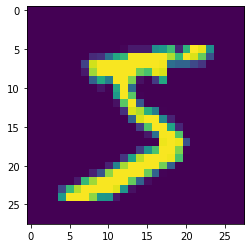

5


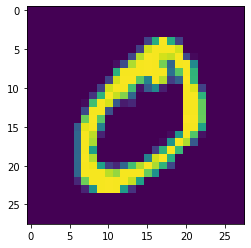

0


In [15]:
# 3. Изменить структуру сети так, чтобы модель переобучалась (для этого можно использовать тест как валидацию). 
# Посмотреть, как это будут выглядеть графики обучения. 
# (Если не удаётся переобучить, то уменьшить размер тренировочной выборки).

def model(opt):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(256,activation = 'relu',input_shape=(784,)))
    #model.add(tf.keras.layers.Dropout(0.8))
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    return model

# train_dir = 'logs\\adam_overfitting\\train'
# train_names = os.listdir(train_dir)

# val_dir = 'logs\\adam_overfitting\\validation'
# val_names = os.listdir(val_dir)

# for x in train_names:
#     path = os.path.join(os.path.abspath(os.path.dirname(x)), 'logs\\adam_overfitting\\train\\' + x)
#     os.remove(path)
# for x in val_names:
#     path = os.path.join(os.path.abspath(os.path.dirname(x)), 'logs\\adam_overfitting\\validation\\' + x)
#     os.remove(path)
    
x_train_scaled = x_train_scaled[:20]
y_train_cl = y_train_cl[:20]
for i in range (2):
    plt.imshow(x_train_scaled.reshape(-1,28,28)[i])
    plt.show()
    print(np.argmax(y_train_cl[i]))

# optimizer = 'adam'
# tensorboard_callback = TensorBoard(log_dir='./logs/'+optimizer+'_overfitting', histogram_freq=1)
# model_adam_overfitting = model(optimizer)

# history = model_adam_overfitting.fit(x_train_scaled, y_train_cl, batch_size=16, validation_data=(x_test_scaled, y_test_cl),
#                                       epochs=30, callbacks=[tensorboard_callback]) 
# y_pred = model_adam_overfitting.predict(x_test_scaled)

In [2]:
# 4. Использовать аугментацию при обучении. Сравнить графики.

from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

y_val = to_categorical(y_val, num_classes=10)

x_val = x_val.astype("float32") / 255
x_val = x_val.reshape(-1, 784) 


In [3]:
import random
import cv2

def aug(img):
    (h, w) = img.shape
    
#    Поворот на случайный угол
    if random.random() > 0.5:
        center = (w // 2, h // 2)
        angle = random.randint(-20,20)
        M = cv2.getRotationMatrix2D(center, angle, 1)  # Указывается центр, угол поворота, масштаб
        img = cv2.warpAffine(img, M, (h,w))
    
#    Размытие.
    if random.random() > 0.5:
        kernel = (random.randint(1,5), random.randint(1,5))
        img = cv2.blur(img, kernel)
          
    return img

In [15]:
def generator_with_aug(x, y, size):
    images = []
    labels = []
    count = 0
    
    for i, l in zip(x,y):
        
        if random.random() > 0.2:  # Отключение аугментации = заккоментить эти две строчки
            i = aug(i)
            
        i = i / 255
        i = i.reshape(-1, 784)
        
        l = tf.keras.utils.to_categorical(l, num_classes=10)
        
        images.append(i)
        labels.append(l)
        count = count + 1
        
        if count % size == 0:
            yield np.array(images).reshape(-1, size, 784)[0], np.array(labels)
            images = []
            labels = []

In [7]:
def model(opt):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(256,activation = 'relu',input_shape=(784,)))
    #model.add(tf.keras.layers.Dropout(0.8))
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [8]:
optimizer = 'adam'
tensorboard_callback = TensorBoard(log_dir='./logs/'+optimizer+'_overfitting_with_augmentation', histogram_freq=1)
model_adam_overfitting = model(optimizer)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_train_dl = []
y_train_dl = []

for i in range(10):
    count = 0
    for j in range(len(y_train)):
        if (y_train[j] == i):
            #print(f"j: {j}, y: {y_train[j]}")
            y_train_dl.append(y_train[j])
            x_train_dl.append(x_train[j])
            count += 1
            if (count == 2): # Будет по две циферки
                break

In [10]:
for i in range(len(y_train_dl)):
    print(f"i: {i}, y: {y_train_dl[i]}")
    #plt.imshow(x_train_dl[i])
    #plt.show()

i: 0, y: 0
i: 1, y: 0
i: 2, y: 1
i: 3, y: 1
i: 4, y: 2
i: 5, y: 2
i: 6, y: 3
i: 7, y: 3
i: 8, y: 4
i: 9, y: 4
i: 10, y: 5
i: 11, y: 5
i: 12, y: 6
i: 13, y: 6
i: 14, y: 7
i: 15, y: 7
i: 16, y: 8
i: 17, y: 8
i: 18, y: 9
i: 19, y: 9


In [11]:
def train_generator_dl(batch_size, epochs):
    for _ in range(epochs):
        data_generator = generator_with_aug(x_train_dl, y_train_dl, batch_size)
        yield from data_generator

In [14]:
print(len(x_val))

12000


In [12]:
batch_size_dl = 5
epochs_dl = 40
steps_per_epoch_dl = int(len(x_train_dl) / batch_size_dl)

history = model_adam_overfitting.fit(train_generator_dl(batch_size_dl, epochs_dl), 
                                     validation_data=(x_val, y_val),
                                     steps_per_epoch = steps_per_epoch_dl,
                                     epochs=epochs_dl, 
                                     callbacks=[tensorboard_callback])

Epoch 1/40
4/4 [==============================] - 2s 306ms/step - loss: 2.6069 - accuracy: 0.0500 - val_loss: 2.2249 - val_accuracy: 0.2435
Epoch 2/40
4/4 [==============================] - 1s 226ms/step - loss: 1.6732 - accuracy: 0.6500 - val_loss: 2.0574 - val_accuracy: 0.3382
Epoch 3/40
4/4 [==============================] - 1s 221ms/step - loss: 1.1587 - accuracy: 0.9500 - val_loss: 1.9163 - val_accuracy: 0.4409
Epoch 4/40
4/4 [==============================] - 1s 216ms/step - loss: 0.7925 - accuracy: 1.0000 - val_loss: 1.7971 - val_accuracy: 0.4893
Epoch 5/40
4/4 [==============================] - 1s 195ms/step - loss: 0.5319 - accuracy: 1.0000 - val_loss: 1.7009 - val_accuracy: 0.5051
Epoch 6/40
4/4 [==============================] - 1s 224ms/step - loss: 0.3507 - accuracy: 1.0000 - val_loss: 1.6266 - val_accuracy: 0.5103
Epoch 7/40
4/4 [==============================] - 1s 224ms/step - loss: 0.2301 - accuracy: 1.0000 - val_loss: 1.5698 - val_accuracy: 0.5133
Epoch 8/40
4/4 [====

In [16]:
batch_size_dl = 5
epochs_dl = 40
steps_per_epoch_dl = int(len(x_train_dl) / batch_size_dl)

history = model_adam_overfitting.fit(train_generator_dl(batch_size_dl, epochs_dl), 
                                     validation_data=(x_val, y_val),
                                     steps_per_epoch = steps_per_epoch_dl,
                                     epochs=epochs_dl, 
                                     callbacks=[tensorboard_callback]) 

Epoch 1/40
4/4 [==============================] - 1s 234ms/step - loss: 0.1056 - accuracy: 0.9500 - val_loss: 1.5681 - val_accuracy: 0.5366
Epoch 2/40
4/4 [==============================] - 1s 221ms/step - loss: 0.1115 - accuracy: 1.0000 - val_loss: 1.6853 - val_accuracy: 0.5242
Epoch 3/40
4/4 [==============================] - 1s 234ms/step - loss: 0.2773 - accuracy: 0.9500 - val_loss: 1.6723 - val_accuracy: 0.5201
Epoch 4/40
4/4 [==============================] - 1s 218ms/step - loss: 0.1724 - accuracy: 0.9500 - val_loss: 1.5081 - val_accuracy: 0.5513
Epoch 5/40
4/4 [==============================] - 1s 223ms/step - loss: 0.3931 - accuracy: 0.9000 - val_loss: 1.5378 - val_accuracy: 0.5355
Epoch 6/40
4/4 [==============================] - 1s 224ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 1.6966 - val_accuracy: 0.5067
Epoch 7/40
4/4 [==============================] - 1s 234ms/step - loss: 0.1953 - accuracy: 0.9500 - val_loss: 1.7763 - val_accuracy: 0.5097
Epoch 8/40
4/4 [====

In [19]:
for i,j in generator_with_aug(x_test, y_test, batch_size_dl):
    break
    
y_pred = model_adam_overfitting.predict(i)

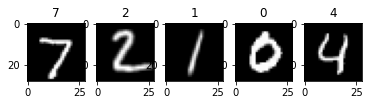

In [20]:
for k in range(batch_size_dl):
    plt.subplot(1, batch_size_dl, k+1)
    plt.imshow(i.reshape(-1,28,28)[k], cmap='gray')
    plt.title(np.argmax(y_pred[k]))
plt.show()